# Delayed tasks analysis


### Convert notebook to python


In [16]:
%%javascript 
IPython.notebook.kernel.execute('nb_name = "' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [18]:
import os

basename, ext = os.path.splitext(nb_name)
input_path = os.path.join(os.getcwd(), nb_name)

!jupyter nbconvert "{input_path}" --to="python" --output="{basename}"

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook d:\OneDrive - Nexus365\Private_Dropbox\Projects\trialexp\notebooks\noncanonical\nb20230222_092800_poster_delayed_tasks_photometry_23apr.ipynb to python
[NbConvertApp] Writing 8249 bytes to d:\OneDrive - Nexus365\Private_Dropbox\Projects\trialexp\notebooks\noncanonical\nb20230222_092800_poster_delayed_tasks_photometry_23apr.py


Quick analysis of instrumental reaching

In [2]:
# allow for automatic reloading of classes and function when updating the code
%load_ext autoreload
%autoreload 2 

# Import Session and Experiment class with helper functions
from trialexp.process.data_import import *



        if you want to export datasets to perform Maching Learning tasks.
        To solve, type pip install sktime in your environment


### Variables

In [3]:
import pandas as pd
from pathlib import Path
trial_window = [-2000, 4000] # in ms

# time limit around trigger to perform an event
# determine successful trials
# timelim = [1000, 4000] # in ms

# Digital channel nb of the pyphotometry device
# on which rsync signal is sent (from pycontrol device)
rsync_chan = 2

basefolder = Path(os.getcwd()).parent.parent

# These must be absolute paths
# use this to use within package tasks files (in params)
tasksfile = Path(basefolder,'params','tasks_params.csv')
# use this to put a local full path
#tasksfile = -r'C:/.../tasks_params.csv' 

# from sample_data

# # From jade
# photometry_dir = Path('/home/MRC.OX.AC.UK/phar0732/ettin/Data/head-fixed/photometry')
# pycontrol_dir = Path('/home/MRC.OX.AC.UK/phar0732/ettin/Data/head-fixed/pycontrol')


video_dir = r'\\ettin\Magill_Lab\Julien\Data\head-fixed\videos'
tasks = pd.read_csv(tasksfile, usecols=[1, 2, 3, 4], index_col=False)


### Create an experiment object


In [5]:
# From julien-pc
photometry_dir = r'\\ettin\Magill_Lab\Julien\Data\head-fixed\_Other\test_folder\delayed_go\pyphotometry\delayed_go_dual_2022'
pycontrol_dir = r'\\ettin\Magill_Lab\Julien\Data\head-fixed\_Other\test_folder\delayed_go\pycontrol\delayed_go_dual_2022'
trial_window=[-3000,6000]
exp_cohort_mixed = Experiment(path=pycontrol_dir, int_subject_IDs=True, update=True, verbose=True)

Saved sessions loaded from: sessions.pkl
session nb:  1 64 2023-02-02 11:18:05 reaching_go_spout_bar_nov22
session nb:  2 64 2023-02-03 15:57:49 reaching_go_spout_bar_nov22
session nb:  3 64 2023-02-06 09:44:31 reaching_go_spout_bar_nov22
session nb:  4 64 2023-02-07 10:20:29 reaching_go_spout_bar_nov22
session nb:  5 64 2023-02-08 10:04:49 reaching_go_spout_bar_nov22
session nb:  6 64 2023-02-09 09:53:17 reaching_go_spout_bar_nov22
session nb:  7 64 2023-02-10 11:55:09 reaching_go_spout_bar_nov22
session nb:  8 64 2023-02-10 12:36:20 reaching_go_spout_bar_nov22
session nb:  9 64 2023-02-13 10:49:49 reaching_go_spout_bar_nov22
session nb:  10 64 2023-02-14 11:50:18 reaching_go_spout_bar_nov22
session nb:  11 64 2023-02-15 10:44:38 reaching_go_spout_bar_nov22
session nb:  12 64 2023-02-16 10:34:24 reaching_go_spout_bar_nov22
session nb:  13 64 2023-02-17 09:49:40 reaching_go_spout_bar_nov22
session nb:  14 64 2023-02-17 09:49:40 reaching_go_spout_bar_nov22
session nb:  15 64 2023-02-20 

In [6]:
exp_cohort_mixed.process_exp_by_trial(trial_window, timelim=None, tasksfile=tasksfile, verbose=True)


processing by trial: JC318L-2022-11-21-161906.txt task: reaching_go_spout_nov22
processing by trial: JC316L-2022-11-23-163430.txt task: reaching_go_spout_bar_nov22
processing by trial: JC317L-2022-11-23-163430.txt task: reaching_go_spout_bar_nov22
processing by trial: JC318L-2022-11-23-164240.txt task: reaching_go_spout_bar_nov22
processing by trial: JC318L-2022-11-24-124705.txt task: reaching_go_spout_bar_nov22
processing by trial: JC316L-2022-11-24-124735.txt task: reaching_go_spout_bar_nov22
processing by trial: JC317L-2022-11-24-124735.txt task: reaching_go_spout_bar_nov22
processing by trial: JC316L-2022-11-25-121246.txt task: reaching_go_spout_bar_nov22
processing by trial: JC317L-2022-11-25-121246.txt task: reaching_go_spout_bar_nov22
processing by trial: JC318L-2022-11-25-121452.txt task: reaching_go_spout_bar_nov22
processing by trial: JC318L-2022-11-25-152337.txt task: reaching_go_spout_bar_nov22
processing by trial: JC316L-2022-11-25-152450.txt task: reaching_go_spout_bar_no

In [7]:
# Defime each trial type as a dictionary of conditions to be met
conditions_dict1 = {'trigger': 'hold_for_water', 'success': True, 'water by spout': True}

# conditions_dict2 = {'trigger': 'hold_for_water', 'success': False, 'hold_timer': True}

conditions_dict2 = {'trigger': 'hold_for_water', 'success': False, 'break_after_abort': True}

# conditions_dict2 = {'trigger': 'hold_for_water', 'spout':False, 'valid': True, 'busy_win_timer': False, 'button_press': False}

# Aggregate all condition dictionaries in a list
conditions_list = [conditions_dict1, conditions_dict2]
# Aliases for conditions
cond_aliases = ['Go - hold hit', 'Go - aborted']
# Groups as a list of lists
# groups = [[280, 281, 282, 289],[295, 282, 284, 285, 292, 297]]
groups = None


In [8]:
# Find if there is a matching photometry file:
exp_cohort_mixed.match_sessions_to_files(photometry_dir, ext='ppd')

# rsync synchronization pulses matching between behaviour and photometry
exp_cohort_mixed.sync_photometry_files(2)
exp_cohort_mixed.save()


d:\onedrive - nexus365\private_dropbox\projects\trialexp\trialexp\utils\rsync.py:78: RuntimeWarning: invalid value encountered in log
  log_mse = np.log(chunk_mse)
d:\onedrive - nexus365\private_dropbox\projects\trialexp\trialexp\utils\rsync.py:78: RuntimeWarning: invalid value encountered in log
  log_mse = np.log(chunk_mse)
d:\onedrive - nexus365\private_dropbox\projects\trialexp\trialexp\utils\rsync.py:78: RuntimeWarning: invalid value encountered in log
  log_mse = np.log(chunk_mse)
d:\onedrive - nexus365\private_dropbox\projects\trialexp\trialexp\utils\rsync.py:78: RuntimeWarning: invalid value encountered in log
  log_mse = np.log(chunk_mse)
d:\onedrive - nexus365\private_dropbox\projects\trialexp\trialexp\utils\rsync.py:78: RuntimeWarning: invalid value encountered in log
  log_mse = np.log(chunk_mse)
d:\onedrive - nexus365\private_dropbox\projects\trialexp\trialexp\utils\rsync.py:78: RuntimeWarning: invalid value encountered in log
  log_mse = np.log(chunk_mse)
d:\onedrive - ne

saved \\ettin\Magill_Lab\Julien\Data\head-fixed\_Other\test_folder\delayed_go\pycontrol\delayed_go_dual_2022\sessions.pkl


In [9]:

trigs = [None, 'bar_off', 'bar_off', 'spout', 'US_end_timer']
last_befores = [None, None, 'spout', None, None]
trial_window = [-4000, 6000]
photo_dataset_mixed = dict()
for idx, trig in enumerate(trigs):
    photo_dataset_mixed[idx] = exp_cohort_mixed.get_photometry_groups(
            groups = None, # or use groups variable defined above
            conditions_list = conditions_list, 
            cond_aliases = cond_aliases,
            trial_window = trial_window,
            when = 'all', 
            task_names = ['reaching_go_spout_bar_nov22'], #'pavlovian_nobar_nodelay', #'reaching_go_nogo',
            trig_on_ev = trig, # align to the first event of a kind e.g. bar_off
            last_before = last_befores[idx],
            baseline_low_pass = 0.01, 
            low_pass = 45, 
            median_filt = 3,
            motion_corr = True, 
            df_over_f = True,
            z_score = True, 
            downsampling_factor = 10, 
            export_vars = ['analog_1_df_over_f', 'zscored_df_over_f'], 
            # remove_artifacts = False, # To Deprecate in favor of Exp level artifact clustering
            verbose = True) # will plot all the process of remove_artifacts if remove_artifacts == True

# 8m 46s

Processing subject 64 at: 2023-02-03 15:57:49
condition 0 trials: 26
Processing subject 64 at: 2023-02-07 10:20:29
condition 0 trials: 46
condition 1 trials: 1
Processing subject 64 at: 2023-02-08 10:04:49
condition 0 trials: 54
condition 1 trials: 59
Processing subject 64 at: 2023-02-09 09:53:17
condition 0 trials: 30
condition 1 trials: 10
Processing subject 64 at: 2023-02-10 11:55:09
condition 0 trials: 33
condition 1 trials: 44
Processing subject 64 at: 2023-02-10 12:36:20
condition 0 trials: 16
condition 1 trials: 7
Processing subject 64 at: 2023-02-13 10:49:49
condition 0 trials: 71
condition 1 trials: 37
Processing subject 64 at: 2023-02-15 10:44:38
condition 0 trials: 92
condition 1 trials: 51
Processing subject 64 at: 2023-02-16 10:34:24
condition 0 trials: 36
condition 1 trials: 33
Processing subject 64 at: 2023-02-17 09:49:40
condition 0 trials: 33
condition 1 trials: 37
Processing subject 64 at: 2023-02-17 09:49:40
condition 0 trials: 33
condition 1 trials: 37
Processing su

Plot photometry trials triggered on different events based on above extraction
- 1: Trial onset (CS-onset = hold period start)
- 2: First bar_off
- 3: Last bar_off before spout
- 4: First spout
- 5: Reward (US_end_timer)

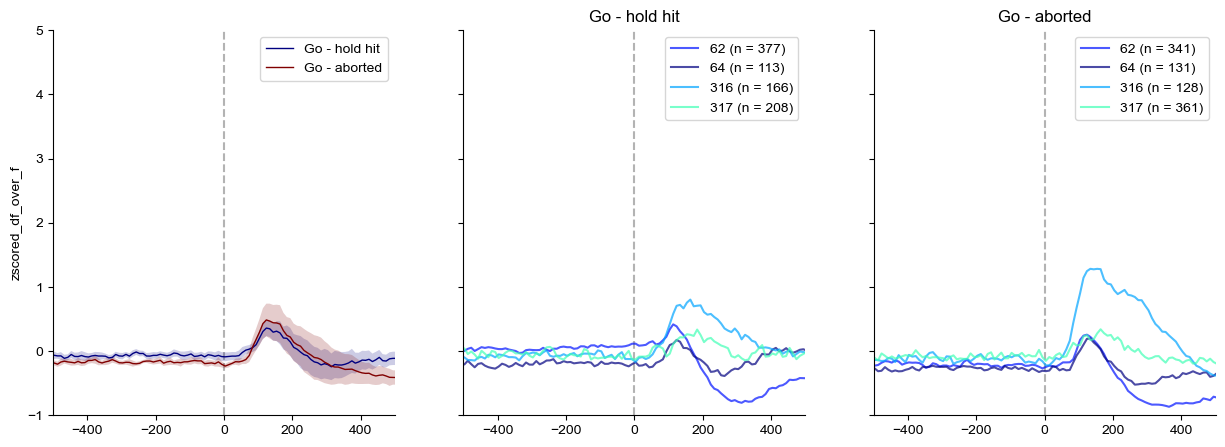

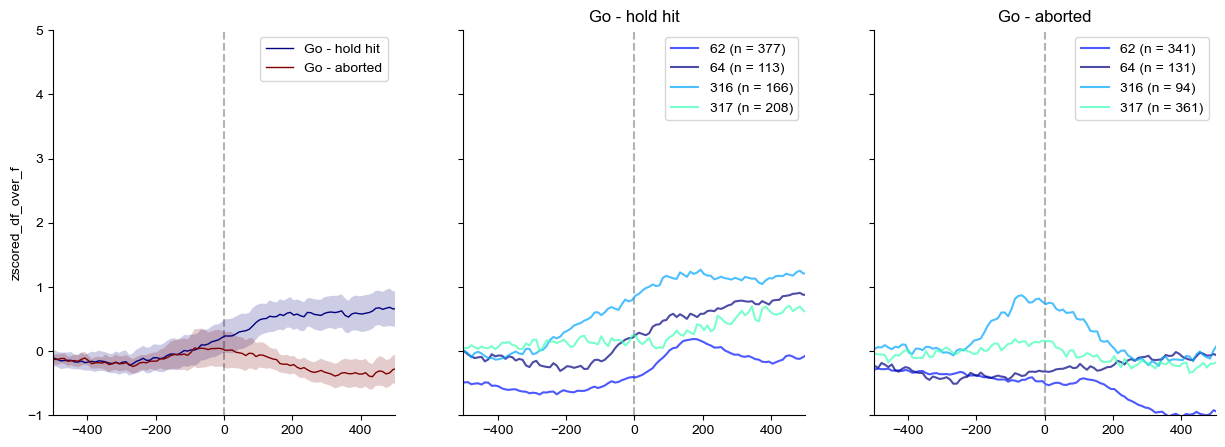

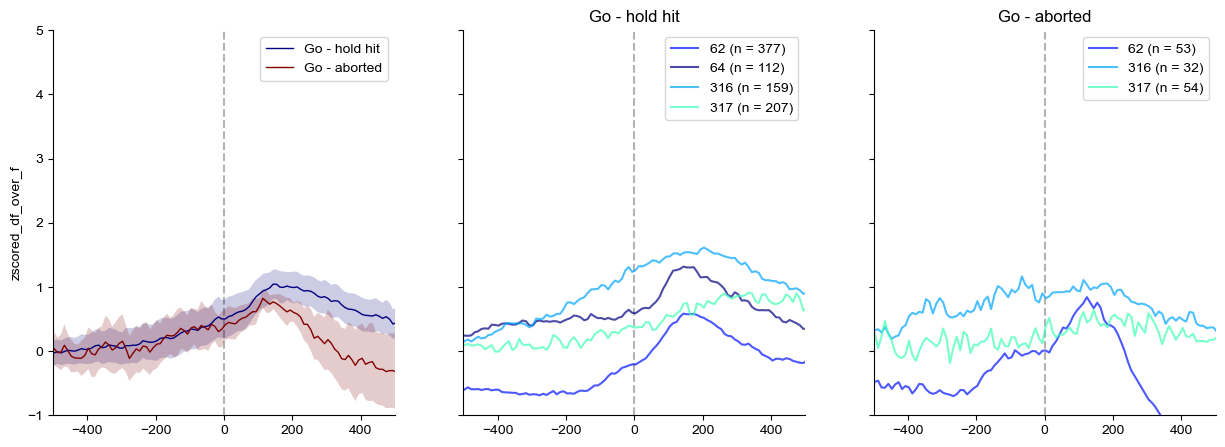

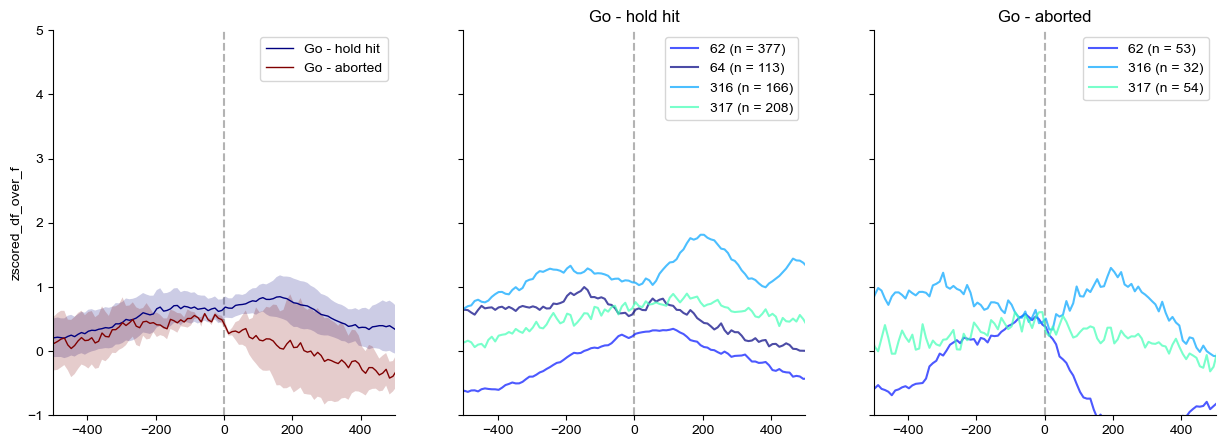

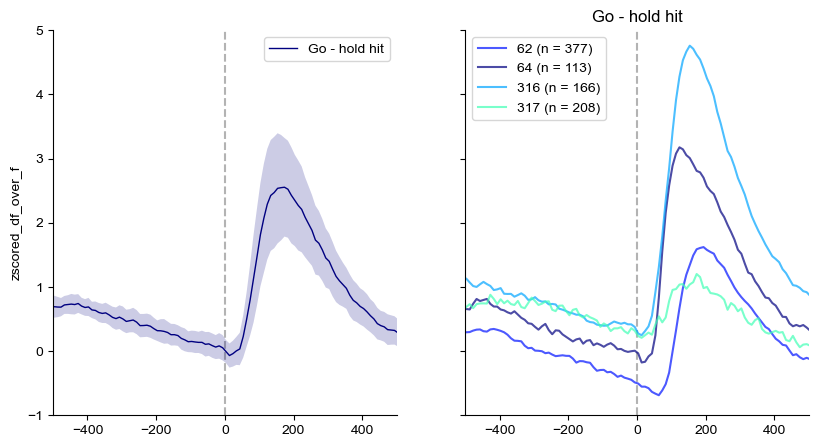

In [10]:
phase_labels = ('Cue_onset','First_mov','Mov_bef_spout','Spout','Reward')

for idx, trig in enumerate(trigs):

    photo_dataset_mixed[idx].filter_reset()
    photo_dataset_mixed[idx].filterout_subjects([0,1,58,63,313,314,315,318])
    photo_dataset_mixed[idx].filter_min_by_session(min_trials = 10)
    photo_dataset_mixed[idx].filter_lastNdays(n = 3)
    if idx == 4:
        figsize = (9.75, 5)
    else:
        figsize = (15, 5)

    fig, axs, out_df = photo_dataset_mixed[idx].lineplot(
        vars = ['zscored_df_over_f'],
        time_lim = [-500, 500],
        # time_unit = 'seconds',
        ylim = [[-1, 5]],# [[-0.004, 0.006]],#[[-0.03, 0.1]],#,[-0.005, 0.007]],#[[-0.001, 0.0011],[-0.001, 0.0011]],
        error = True,
        colormap = 'jet',
        legend = True,
        plot_subjects = True,
        plot_groups = True,
        liney0 = False,
        linex0 = True,
        figsize = figsize,
        dpi = 100,
        verbose = False)

    # file_path = 'C:\\Users\\phar0732\\Documents\\GitHub\\trialexp\\outputs\\' + 'photo_ave_' + phase_labels[idx] + '.pdf'
    # fig.savefig(file_path)

# Compare the results for analog_2_filt

In [11]:
photo_dataset_mixed2 = dict()
for idx, trig in enumerate(trigs):
    photo_dataset_mixed2[idx] = exp_cohort_mixed.get_photometry_groups(
            groups = None, # or use groups variable defined above
            conditions_list = conditions_list, 
            cond_aliases = cond_aliases,
            trial_window = trial_window,
            when = 'all', 
            task_names = ['reaching_go_spout_bar_nov22'], #'pavlovian_nobar_nodelay', #'reaching_go_nogo',
            trig_on_ev = trig, # align to the first event of a kind e.g. bar_off
            last_before = last_befores[idx],
            baseline_low_pass = 0.01, 
            low_pass = 45, 
            median_filt = 3,
            motion_corr = True, 
            df_over_f = True,
            z_score = True, 
            downsampling_factor = 10, 
            export_vars = ['analog_2_filt'], 
            # remove_artifacts = False, # To Deprecate in favor of Exp level artifact clustering
            verbose = True) # will plot all the process of remove_artifacts if remove_artifacts == True

# 9m 40s


Processing subject 64 at: 2023-02-03 15:57:49
condition 0 trials: 26
Processing subject 64 at: 2023-02-07 10:20:29
condition 0 trials: 46
condition 1 trials: 1
Processing subject 64 at: 2023-02-08 10:04:49
condition 0 trials: 54
condition 1 trials: 59
Processing subject 64 at: 2023-02-09 09:53:17
condition 0 trials: 30
condition 1 trials: 10
Processing subject 64 at: 2023-02-10 11:55:09
condition 0 trials: 33
condition 1 trials: 44
Processing subject 64 at: 2023-02-10 12:36:20
condition 0 trials: 16
condition 1 trials: 7
Processing subject 64 at: 2023-02-13 10:49:49
condition 0 trials: 71
condition 1 trials: 37
Processing subject 64 at: 2023-02-15 10:44:38
condition 0 trials: 92
condition 1 trials: 51
Processing subject 64 at: 2023-02-16 10:34:24
condition 0 trials: 36
condition 1 trials: 33
Processing subject 64 at: 2023-02-17 09:49:40
condition 0 trials: 33
condition 1 trials: 37
Processing subject 64 at: 2023-02-17 09:49:40
condition 0 trials: 33
condition 1 trials: 37
Processing su

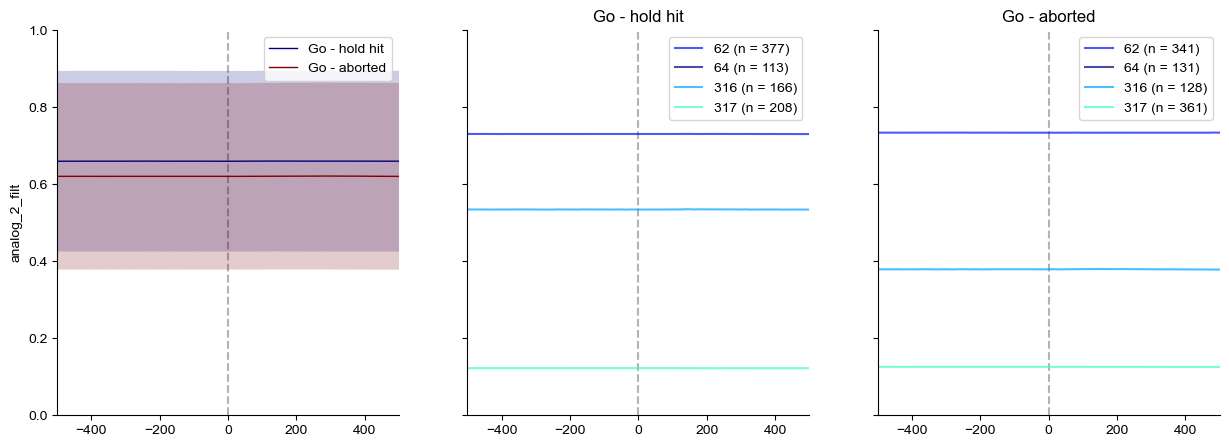

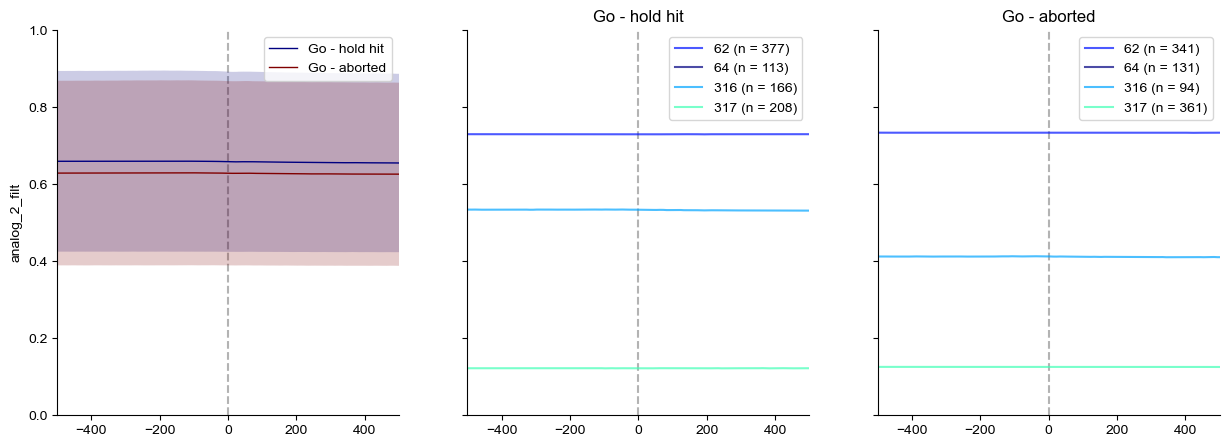

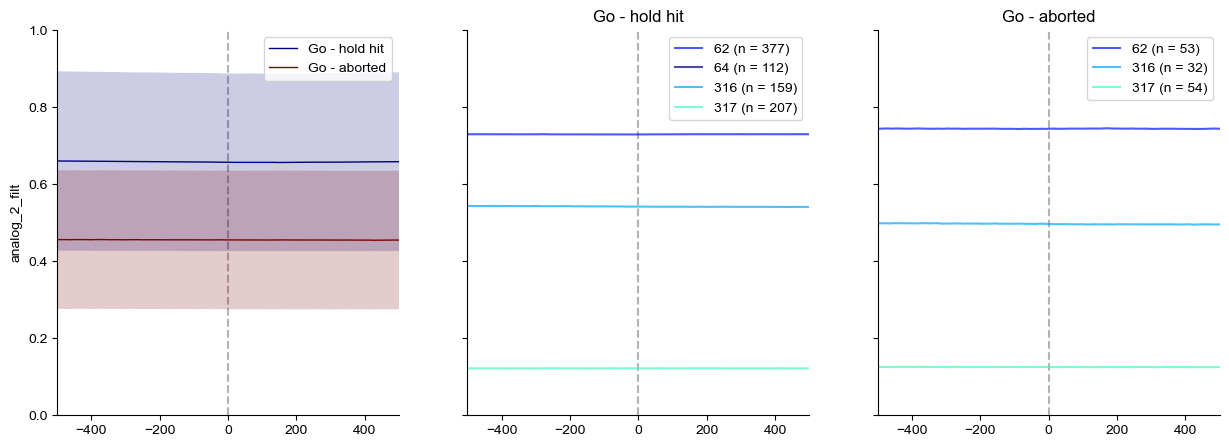

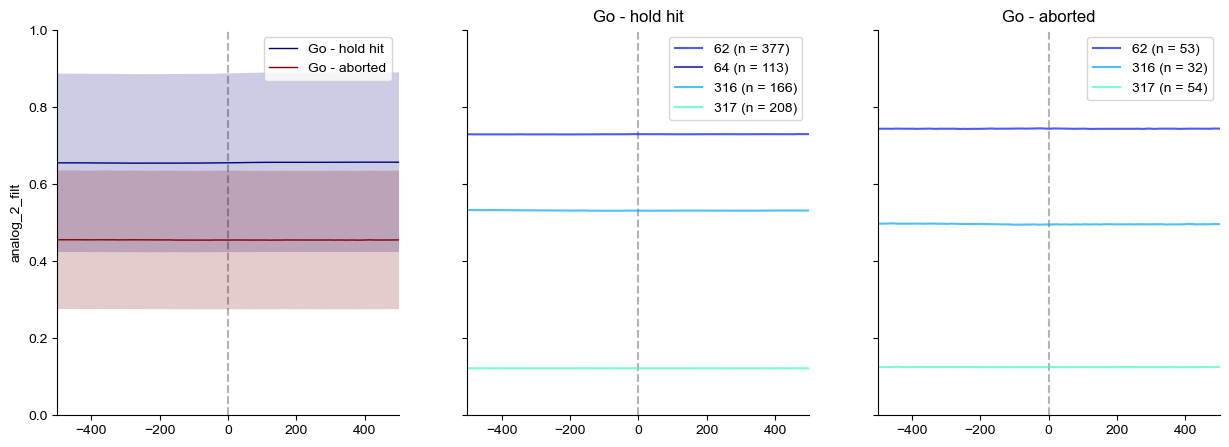

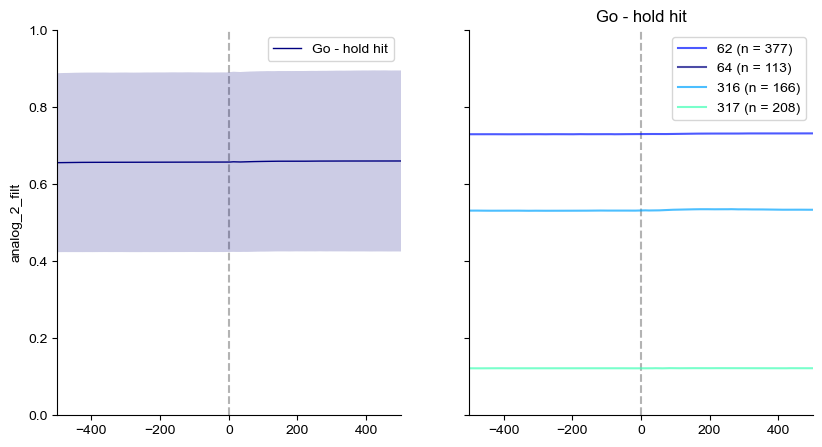

In [13]:
phase_labels = ('Cue_onset','First_mov','Mov_bef_spout','Spout','Reward')

for idx, trig in enumerate(trigs):

    photo_dataset_mixed2[idx].filter_reset()
    photo_dataset_mixed2[idx].filterout_subjects([0,1,58,63,313,314,315,318])
    photo_dataset_mixed2[idx].filter_min_by_session(min_trials = 10)
    photo_dataset_mixed2[idx].filter_lastNdays(n = 3)
    if idx == 4:
        figsize = (9.75, 5)
    else:
        figsize = (15, 5)

    fig, axs, out_df = photo_dataset_mixed2[idx].lineplot(
        vars = ['analog_2_filt'],
        time_lim = [-500, 500],
        # time_unit = 'seconds',
        ylim = [[0, 1]],# [[-0.004, 0.006]],#[[-0.03, 0.1]],#,[-0.005, 0.007]],#[[-0.001, 0.0011],[-0.001, 0.0011]],
        error = True,
        colormap = 'jet',
        legend = True,
        plot_subjects = True,
        plot_groups = True,
        liney0 = False,
        linex0 = True,
        figsize = figsize,
        dpi = 100,
        verbose = False)

    # file_path = 'C:\\Users\\phar0732\\Documents\\GitHub\\trialexp\\outputs\\' + 'photo_ave_' + phase_labels[idx] + '.pdf'
    # fig.savefig(file_path)

Don't understand why they are so flat? Looks very suspicious